# MTH3302 - Méthodes probabilistes et statistiques pour I.A.
#### Polytechnique Montréal


### Projet A2024

-----

# Prédiction de la consommation en carburant de voitures récentes.

### Contexte

## TODO

### Objectif

## TODO

### Données
Les données utilisées pour inférer la consommation de carburant sont les suivantes :

## TODO


In [ ]:
using CSV, DataFrames, Statistics, Dates, Gadfly, Combinatorics, Plots, StatsBase
import StatsBase

In [9]:
full_train = CSV.read("../data/raw/train.csv", DataFrame)
test =  CSV.read("../data/raw/test.csv", DataFrame) #ne contient pas la varialbe consommation

ntrain = round(Int, .8*nrow(full_train)) #80% des données pour l'entrainement: 80% * nb de lignes

train_id = sample(1:nrow(full_train), ntrain, replace=false, ordered=true) #échantillonnage aléatoire pour l'entrainement
valid_id = setdiff(1:nrow(full_train), train_id) #échantillon de validation. prend celles qui ne sont pas dans l'échantillon d'entrainement

train = full_train[train_id, :]  
valid = full_train[valid_id, :]

first(train, 5)



UndefVarError: UndefVarError: `sample` not defined

### 1. Étude des données 

7×7 DataFrame
 Row │ variable          mean     min               median  max                    nmissing  eltype   
     │ Symbol            Union…   Any               Union…  Any                    Int64     DataType 
─────┼────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ annee             2019.11  2014              2019.0  2024                          0  Int64
   2 │ type                       VUS_petit                 voiture_sous_compacte         0  String31
   3 │ nombre_cylindres  5.33754  3                 4.0     12                            0  Int64
   4 │ cylindree                  1,2                       6,8                           0  String3
   5 │ transmission               4x4                       traction                      0  String15
   6 │ boite                      automatique               manuelle                      0  String15
   7 │ consommation               10,2265217391304          9,8004166666

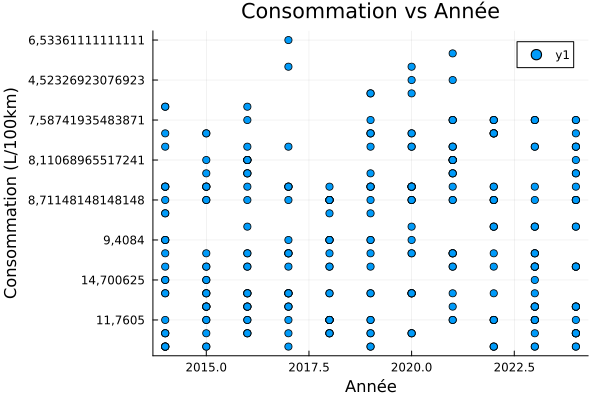

In [14]:
# Résumé des données
println(describe(train))

# Visualisation de la consommation en fonction de l'année
scatter(train.annee, train.consommation, title="Consommation vs Année", xlabel="Année", ylabel="Consommation (L/100km)")


# 2. Prétraitement des données

In [1]:
data = deepcopy(train)
#data = dropmissing(data)

UndefVarError: UndefVarError: `train` not defined

In [5]:
# Remplacer les virgules par des points dans 'cylindree'
data.cylindree = replace.(data.cylindree, "," => ".")

# Remplacer les virgules par des points dans 'consommation'
data.consommation = replace.(data.consommation, "," => ".")

317-element Vector{String}:
 "13.8358823529412"
 "9.80041666666667"
 "11.7605"
 "13.0672222222222"
 "13.8358823529412"
 "13.8358823529412"
 "11.2004761904762"
 "11.7605"
 "11.7605"
 "14.700625"
 ⋮
 "11.7605"
 "9.4084"
 "10.2265217391304"
 "12.3794736842105"
 "7.84033333333333"
 "8.71148148148148"
 "10.2265217391304"
 "11.2004761904762"
 "7.84033333333333"

In [6]:
function safe_parse_float(x)
    try
        return parse(Float64, x)
    catch
        return missing
    end
end

safe_parse_float (generic function with 1 method)

In [7]:
# Convertir 'cylindree' en Float64
data.cylindree = safe_parse_float.(data.cylindree)

# Convertir 'consommation' en Float64
data.consommation = safe_parse_float.(data.consommation)

317-element Vector{Float64}:
 13.8358823529412
  9.80041666666667
 11.7605
 13.0672222222222
 13.8358823529412
 13.8358823529412
 11.2004761904762
 11.7605
 11.7605
 14.700625
  ⋮
 11.7605
  9.4084
 10.2265217391304
 12.3794736842105
  7.84033333333333
  8.71148148148148
 10.2265217391304
 11.2004761904762
  7.84033333333333

In [8]:
# Résumé des données
println(describe(data))

7×7 DataFrame
 Row │ variable          mean     min          median   max                    nmissing  eltype   
     │ Symbol            Union…   Any          Union…   Any                    Int64     DataType 
─────┼────────────────────────────────────────────────────────────────────────────────────────────
   1 │ annee             2019.11  2014         2019.0   2024                          0  Int64
   2 │ type                       VUS_petit             voiture_sous_compacte         0  String31
   3 │ nombre_cylindres  5.33754  3            4.0      12                            0  Int64
   4 │ cylindree         2.94132  1.2          2.5      6.8                           0  Float64
   5 │ transmission               4x4                   traction                      0  String15
   6 │ boite                      automatique           manuelle                      0  String15
   7 │ consommation      10.4128  4.52327      10.2265  16.8007                       0  Float64


In [9]:
numeric_cols = [:annee, :nombre_cylindres, :cylindree, :consommation]

M = cor(Matrix(data[:, numeric_cols]))

# Afficher la matrice de corrélation
println("Matrice de corrélation :")
println(M)

# PLOT
(n,m) = size(M)
heatmap(M, fc=cgrad([:white,:dodgerblue4]), xticks=(1:m,cols), xrot=90, yticks=(1:m,cols), yflip=true)
annotate!([(j, i, text(round(M[i,j],digits=3), 8,"Computer Modern",:black)) for i in 1:n for j in 1:m])

Matrice de corrélation :
[1.0 -0.16478978809860811 -0.19265872032477582 -0.19658079608313941; -0.16478978809860811 1.0 0.9438179607943886 0.8522808015661816; -0.19265872032477582 0.9438179607943886 1.0 0.8606354785011544; -0.19658079608313941 0.8522808015661816 0.8606354785011544 1.0]


UndefVarError: UndefVarError: `cgrad` not defined

1. `nombre_cylindres` et `cylindree` est très élevée (0.944), ce qui indique une forte relation positive. Cela suggère que le nombre de cylindres est fortement associé à la cylindrée des véhicules.

2. La corrélation entre `cylindree` et `consommation` est également élevée (0.866), montrant qu'une augmentation de la cylindrée est associée à une augmentation de la consommation (par exemple, les moteurs plus gros consomment plus de carburant).

3. Une corrélation similaire (0.861) existe entre `nombre_cylindres` et `consommation`, ce qui est logique, car le nombre de cylindres et la cylindrée sont liés.

4. Les corrélations entre annee et les autres variables sont faibles et négatives (-0.16 à -0.19), indiquant que les variables comme le nombre de cylindres, la cylindrée et la consommation ont légèrement diminué avec le temps.

## Nombre de cylindrée

In [10]:
set_default_plot_size(10cm, 8cm)
Gadfly.plot(data,
    x = :annee,
    y = :consommation,
    color = :nombre_cylindres,
    Geom.point,
    Geom.smooth(method = :lm),
    Guide.xlabel("Année"),
    Guide.ylabel("Consommation (L/100km)"),
    Guide.colorkey("Nombre de cylindres"))

Plot(...)

In [11]:
scatter(train.cylindree, train.consommation, xlabel="Cylindrée (L)", ylabel="Consommation (L/100km)", title="Consommation vs Cylindrée")

UndefVarError: UndefVarError: `scatter` not defined